
# Import libraries

In [ ]:
import cv2
import numpy as np

# import deep learning library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os,sys
# import deep learning library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

import os


# **Connect to the dataset (a folder in google drive)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
CLASS_NAMES = ['Blue', 'Green','Red']
CLASS_NAMES2 = ['bolts', 'cups','scissors', 'screwdrivers']
CLASS_NAMES3 = ['apple', 'bolts', 'cups','scissors', 'screwdrivers']

data_dir = 'drive/My Drive/Jupyter/Virtual_object'
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

# **Load data using a Keras utility**

### Creat a dataset

In [ ]:
# training_dir = os.path.join(data_dir, 'train')
# validation_dir = os.path.join(data_dir, 'validation')
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range = 0.2, zoom_range= 0.2, rotation_range= 20, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            training_dir,
            target_size=(100,100),
            batch_size=32,
            class_mode='categorical',
            shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
            validation_dir,
            target_size=(100,100),
            batch_size=32,
            class_mode='categorical',
            shuffle=True
)

Found 846 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
train_generator

# CNN model

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

NUM_TRAIN_DATA = train_generator.n
NUM_VALID_DATA = valid_generator.n

BATCH_SIZE = 32
EPOCHS = 20


my_history = model.fit(train_generator,
          steps_per_epoch=NUM_TRAIN_DATA // BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20


25/25 - 555s - loss: 1.6384 - acc: 0.1877 - val_loss: 1.6094 - val_acc: 0.1778 - 555s/epoch - 22s/step
Epoch 2/20
25/25 - 13s - loss: 1.6232 - acc: 0.1799 - 13s/epoch - 531ms/step
Epoch 3/20
25/25 - 13s - loss: 1.6237 - acc: 0.1967 - 13s/epoch - 535ms/step
Epoch 4/20
25/25 - 13s - loss: 1.6161 - acc: 0.2069 - 13s/epoch - 538ms/step
Epoch 5/20
25/25 - 13s - loss: 1.6127 - acc: 0.2057 - 13s/epoch - 537ms/step
Epoch 6/20
25/25 - 13s - loss: 1.6125 - acc: 0.2031 - 13s/epoch - 535ms/step
Epoch 7/20
25/25 - 13s - loss: 1.6120 - acc: 0.2018 - 13s/epoch - 537ms/step
Epoch 8/20
25/25 - 13s - loss: 1.6102 - acc: 0.2121 - 13s/epoch - 536ms/step
Epoch 9/20
25/25 - 13s - loss: 1.6138 - acc: 0.2005 - 13s/epoch - 508ms/step
Epoch 10/20
25/25 - 13s - loss: 1.6124 - acc: 0.2108 - 13s/epoch - 530ms/step
Epoch 11/20
25/25 - 15s - loss: 1.6091 - acc: 0.2095 - 15s/epoch - 600ms/step
Epoch 12/20
25/25 - 12s - loss: 1.6096 - acc: 0.1967 - 12s/epoch - 478ms/step
Epoch 13/20
25/25 - 14s - loss: 1.6087 - acc: 0

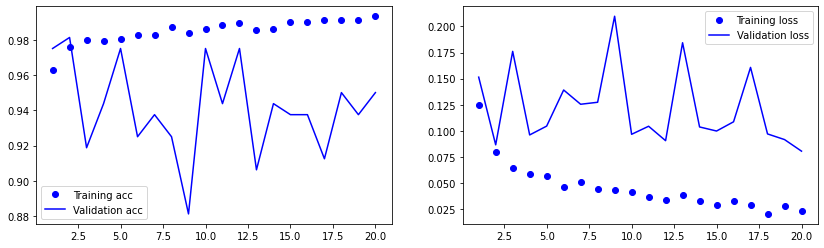

In [ ]:

acc = my_history.history['acc']
val_acc = my_history.history['val_acc']
loss = my_history.history['loss']
val_loss = my_history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

# Pretrained model (import the model VGG16)


In [ ]:
from keras.applications import VGG16
Model_base = VGG16()
print(Model_base.summary())

553467096/553467096 [==============================] - 21s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

# [Transfer learning] Using pretrained layers as features extractor


In [ ]:
import numpy as np
from keras.applications import VGG16


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  # input_shape=(100, 100, 3))
                  input_shape=(240, 240, 3))




datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count,5)  )#2

    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
        target_size=(240, 240),
        batch_size = batch_size,
        class_mode='categorical')

    i = 0


    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(training_dir, 846) #16
validation_features, validation_labels = extract_features(validation_dir, 50) #4



Found 846 images belonging to 5 classes.
1/1 [==============================] - 11s 11s/step
Found 50 images belonging to 5 classes.
1/1 [==============================] - 14s 14s/step


In [ ]:
# reshaping the features to be input to the dense layers

# train_features = np.reshape(train_features, (16, 7 * 7 * 512)) #32
# validation_features = np.reshape(validation_features, (4, 7 * 7 * 512))#32

train_features = np.reshape(train_features, (846, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (50, 7 * 7 * 512))


In [ ]:
# Building a classifier
from keras import layers
from keras import models
from keras import optimizers
classifier_model = models.Sequential()
classifier_model.add(layers.Dense(2048, activation='relu', input_dim=7 * 7 * 512))
classifier_model.add(layers.Dropout(0.5))
classifier_model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
classifier_model.add(layers.Dropout(0.5))
classifier_model.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
classifier_model.add(layers.Dropout(0.5))
classifier_model.add(layers.Dense(5, activation='softmax'))
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 6

In [ ]:

classifier_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])
classifier_history = classifier_model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))


Epoch 1/50
27/27 [==============================] - 23s 802ms/step - loss: 6.6987 - acc: 0.2234 - val_loss: 1.6148 - val_acc: 0.3200
Epoch 2/50
27/27 [==============================] - 16s 582ms/step - loss: 2.9629 - acc: 0.2411 - val_loss: 1.5661 - val_acc: 0.3200
Epoch 3/50
27/27 [==============================] - 13s 497ms/step - loss: 1.8794 - acc: 0.2766 - val_loss: 1.5100 - val_acc: 0.3200
Epoch 4/50
27/27 [==============================] - 13s 497ms/step - loss: 1.6746 - acc: 0.2872 - val_loss: 1.4217 - val_acc: 0.4200
Epoch 5/50
27/27 [==============================] - 12s 461ms/step - loss: 1.5600 - acc: 0.3014 - val_loss: 1.3687 - val_acc: 0.4600
Epoch 6/50
27/27 [==============================] - 12s 442ms/step - loss: 1.4612 - acc: 0.3617 - val_loss: 1.2853 - val_acc: 0.4800
Epoch 7/50
27/27 [==============================] - 14s 506ms/step - loss: 1.4446 - acc: 0.3794 - val_loss: 1.1968 - val_acc: 0.6000
Epoch 8/50
27/27 [==============================] - 13s 479ms/step - 

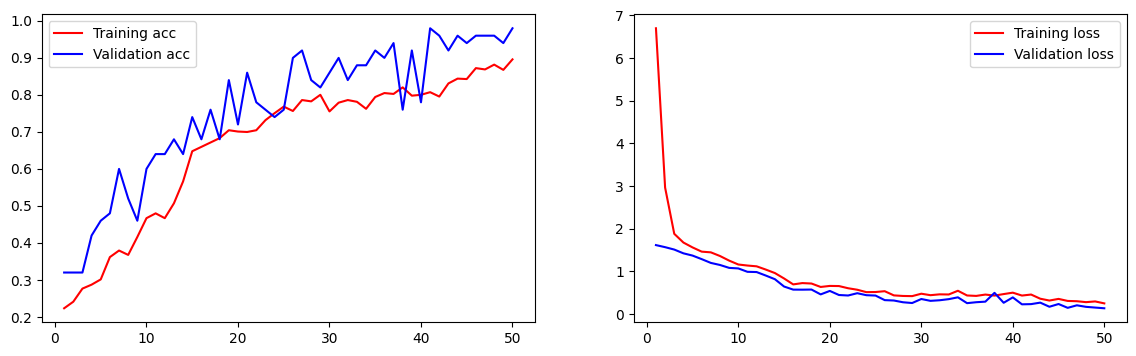

0.9800000190734863


In [ ]:
import matplotlib.pyplot as plt
acc = classifier_history.history['acc']
val_acc = classifier_history.history['val_acc']
loss = classifier_history.history['loss']
val_loss = classifier_history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'r', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'r', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

print(val_acc[-1])

## additional train

In [ ]:
classifier_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])
classifier_history = classifier_model.fit(train_features, train_labels,
                    epochs=25,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))


Epoch 1/25
51/51 [==============================] - 28s 517ms/step - loss: 0.5825 - acc: 0.7309 - val_loss: 0.4092 - val_acc: 0.8889
Epoch 2/25
51/51 [==============================] - 19s 368ms/step - loss: 0.5249 - acc: 0.7580 - val_loss: 0.3491 - val_acc: 0.7778
Epoch 3/25
51/51 [==============================] - 18s 348ms/step - loss: 0.5549 - acc: 0.7494 - val_loss: 0.5716 - val_acc: 0.7778
Epoch 4/25
51/51 [==============================] - 19s 376ms/step - loss: 0.5417 - acc: 0.7568 - val_loss: 0.4609 - val_acc: 0.8222
Epoch 5/25
51/51 [==============================] - 21s 413ms/step - loss: 0.4700 - acc: 0.7852 - val_loss: 0.3347 - val_acc: 0.8444
Epoch 6/25
51/51 [==============================] - 18s 351ms/step - loss: 0.4655 - acc: 0.7802 - val_loss: 0.5797 - val_acc: 0.7778
Epoch 7/25
51/51 [==============================] - 18s 353ms/step - loss: 0.5107 - acc: 0.7630 - val_loss: 0.4904 - val_acc: 0.8222
Epoch 8/25
51/51 [==============================] - 21s 407ms/step - 

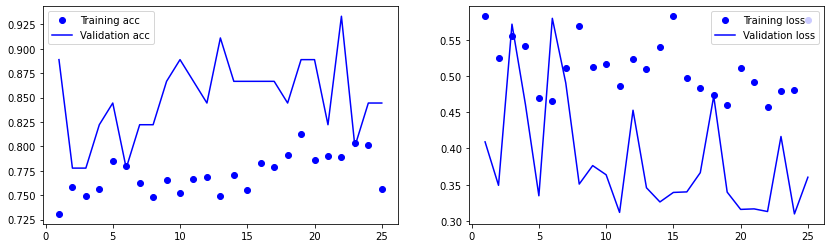

In [ ]:
import matplotlib.pyplot as plt
acc = classifier_history.history['acc']
val_acc = classifier_history.history['val_acc']
loss = classifier_history.history['loss']
val_loss = classifier_history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
val_acc[-1]

0.8444444537162781

In [ ]:
train_features

array([[0.79655826, 0.        , 0.        , ..., 0.        , 0.33836198,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79704934, 0.        , 0.        , ..., 0.        , 0.28441614,
        0.        ],
       ...,
       [0.08180627, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18003115, 0.        , 0.        , ..., 0.        , 0.46950498,
        0.        ]])

# HoG

## HoG RF

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set the parameters
img_height = 100
img_width = 100
num_train_samples = 846
num_valid_samples = 50
batch_size = 32
# train_dir = 'train'
# valid_dir = 'valid'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Data augmentation for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Extract features for training data
train_features = []
train_labels = []

for i in range(num_train_samples):
    # Load training images
    img_path = training_dir + '/' + train_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    train_features.append(hog_feature)
    train_labels.append(train_generator.classes[i])

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Extract features for validation data
valid_features = []
valid_labels = []

for i in range(num_valid_samples):
    # Load validation images
    img_path = validation_dir + '/' + valid_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    valid_features.append(hog_feature)
    valid_labels.append(valid_generator.classes[i])

valid_features = np.array(valid_features)
valid_labels = np.array(valid_labels)

# Train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_features, train_labels)

# Evaluate the classifier on validation data
y_pred = rf_clf.predict(valid_features)
accuracy = accuracy_score(valid_labels, y_pred)
print('Accuracy:', accuracy)


Found 846 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Accuracy: 0.94


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set the parameters
img_height = 100
img_width = 100
num_train_samples = 846
num_valid_samples = 50
batch_size = 32
# train_dir = 'train'
# valid_dir = 'valid'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Data augmentation for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Extract features for training data
train_features = []
train_labels = []

for i in range(num_train_samples):
    # Load training images
    img_path = training_dir + '/' + train_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    train_features.append(hog_feature)
    train_labels.append(train_generator.classes[i])

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Extract features for validation data
valid_features = []
valid_labels = []

for i in range(num_valid_samples):
    # Load validation images
    img_path = validation_dir + '/' + valid_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    valid_features.append(hog_feature)
    valid_labels.append(valid_generator.classes[i])

valid_features = np.array(valid_features)
valid_labels = np.array(valid_labels)

# Train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(train_features, train_labels)

# Evaluate the classifier on validation data
y_pred = rf_clf.predict(valid_features)
accuracy = accuracy_score(valid_labels, y_pred)
print('Accuracy:', accuracy)


Found 846 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Accuracy: 0.92


## HoG decision tree

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from skimage.feature import hog
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Set the parameters
img_height = 100
img_width = 100
num_train_samples = 846
num_valid_samples = 50
batch_size = 32
# train_dir = 'train'
# valid_dir = 'valid'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Data augmentation for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Extract features for training data
train_features = []
train_labels = []

for i in range(num_train_samples):
    # Load training images
    img_path = training_dir + '/' + train_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    train_features.append(hog_feature)
    train_labels.append(train_generator.classes[i])

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Extract features for validation data
valid_features = []
valid_labels = []

for i in range(num_valid_samples):
    # Load validation images
    img_path = validation_dir + '/' + valid_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    valid_features.append(hog_feature)
    valid_labels.append(valid_generator.classes[i])

valid_features = np.array(valid_features)
valid_labels = np.array(valid_labels)

# Train a random forest classifier
rf_clf = DecisionTreeClassifier(random_state=42)
rf_clf.fit(train_features, train_labels)

# Evaluate the classifier on validation data
y_pred = rf_clf.predict(valid_features)
accuracy = accuracy_score(valid_labels, y_pred)
print('Accuracy:', accuracy)


Found 846 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Accuracy: 0.7


## HoG knn

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set the parameters
img_height = 100
img_width = 100
num_train_samples = 846
num_valid_samples = 50
batch_size = 32
# train_dir = 'train'
# valid_dir = 'valid'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Data augmentation for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Extract features for training data
train_features = []
train_labels = []

for i in range(num_train_samples):
    # Load training images
    img_path = training_dir + '/' + train_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    train_features.append(hog_feature)
    train_labels.append(train_generator.classes[i])

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Extract features for validation data
valid_features = []
valid_labels = []

for i in range(num_valid_samples):
    # Load validation images
    img_path = validation_dir + '/' + valid_generator.filenames[i]
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img.astype('uint8')

    # Extract HOG features
    hog_feature = hog(img[:,:,0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    valid_features.append(hog_feature)
    valid_labels.append(valid_generator.classes[i])

valid_features = np.array(valid_features)
valid_labels = np.array(valid_labels)

# Train a random forest classifier
rf_clf = KNeighborsClassifier ()
rf_clf.fit(train_features, train_labels)

# Evaluate the classifier on validation data
y_pred = rf_clf.predict(valid_features)
accuracy = accuracy_score(valid_labels, y_pred)
print('Accuracy:', accuracy)


Found 846 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Accuracy: 0.8


# check

In [ ]:
train_generator.filenames[1:3]

['Apple/Saved_View_1 (11).png', 'Apple/Saved_View_1 (12).png']

In [ ]:
train_generator.class_indices

{'Apple': 0, 'Bolt': 1, 'Kopp': 2, 'Scissor': 3, 'Screw-driver': 4}

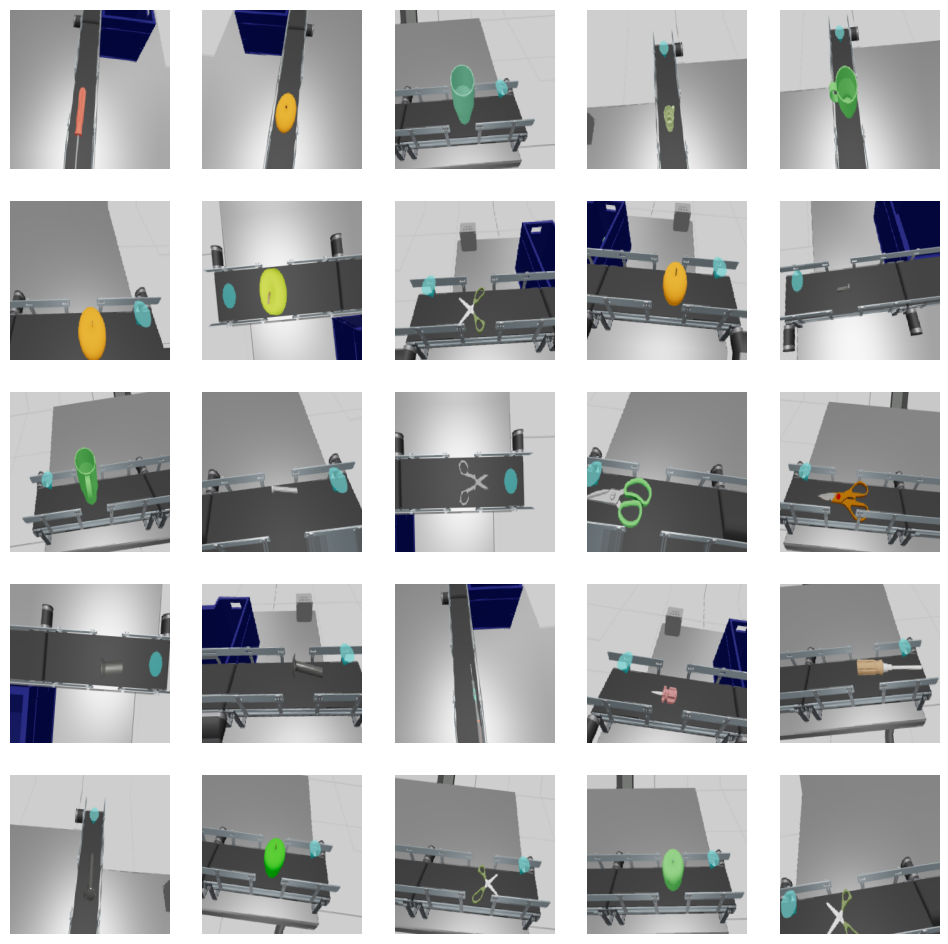

In [ ]:
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')
